In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath('../'))
from data import Data

## Load Data

In [3]:
d = Data()

In [ ]:
trackFeaturesDF = d.getAllUniqueTrackFeatures()

In [5]:
trackFeaturesDF.head()

,acousticness,catalog,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.5680,[{'popularity': 0}],0.458,0.591,0.000015,5,0.286,-5.621,1,0.0326,184.913,3,spotify:track:0000uJA4xCdxThagdLkkLR,0.654
1,0.7970,[{'popularity': 11}],0.455,0.623,0.903000,8,0.634,-11.572,1,0.0523,182.345,4,spotify:track:0002yNGLtYSYtc0X6ZnFvp,0.951
2,0.0178,[{'popularity': 13}],0.742,0.753,0.000000,1,0.133,-5.632,1,0.0364,132.064,4,spotify:track:00039MgrmLoIzSpuYKurn9,0.263
3,0.0860,[{'popularity': 22}],0.733,0.711,0.000000,1,0.451,-5.408,1,0.1580,138.076,4,spotify:track:0003Z98F6hUq7XxqSRM87H,0.346
4,0.0147,[{'popularity': 15}],0.584,0.947,0.000039,4,0.110,-3.700,1,0.0747,100.868,4,spotify:track:0004ExljAge0P5XWn1LXmW,0.461


In [15]:
trackFeaturesDF.count()

acousticness        2262133
catalog             2262133
danceability        2262133
energy              2262133
instrumentalness    2262133
key                 2262133
liveness            2262133
loudness            2262133
mode                2262133
speechiness         2262133
tempo               2262133
time_signature      2262133
uri                 2262133
valence             2262132
dtype: int64

In [4]:
d.createPlaylistAvgFeatures()

In [5]:
d.createPlaylistMaxFeatures()

## Univariate

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


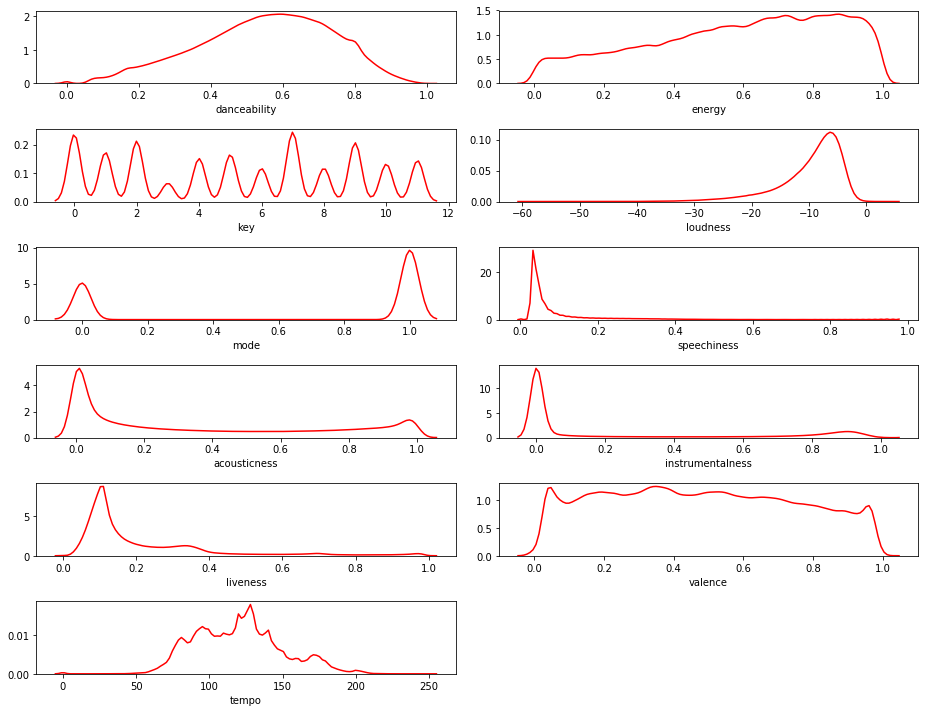

In [15]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for i in range(1, len(cols)+1):
    plt.subplot(6, 2, i)
    sns.distplot(trackFeaturesDF[cols[i-1]], hist=False, color='r')
plt.tight_layout()

## Avg Playlist Features

In [4]:
playlistFeatures = d.getPlaylistAvgFeatures()

In [5]:
playlistFeatures.shape

(1000000, 12)

In [6]:
cols = ['energy', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'timesig']
playlistFeaturesDF = pd.DataFrame(playlistFeatures, columns=cols)

In [7]:
playlistFeaturesDF.head()

,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,timesig
0,0.782269,0.659212,5.038462,-4.878481,0.692308,0.107188,0.082981,0.000676,0.191138,0.642615,123.007538,4.000000
1,0.690128,0.494715,4.461538,-8.288436,0.538462,0.089085,0.164050,0.224431,0.185708,0.475487,124.907615,3.769231
2,0.693203,0.671875,5.000000,-4.874156,0.515625,0.096287,0.269230,0.000638,0.169028,0.565078,114.600672,4.000000
3,0.621242,0.513563,5.103175,-9.614833,0.714286,0.067202,0.273845,0.202057,0.188834,0.451901,125.032492,3.952381
4,0.650535,0.576765,3.352941,-7.634471,0.823529,0.041159,0.177148,0.081875,0.166524,0.490765,127.759882,3.941176


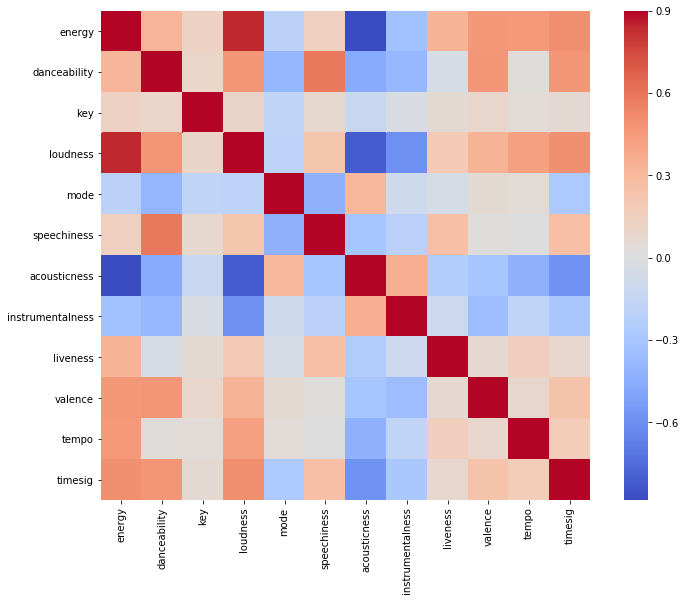

In [20]:
#correlation matrix
corrmat = playlistFeaturesDF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True, cmap='coolwarm');

In [ ]:
from sklearn import manifold

In [30]:
idx = np.random.randint(1000000, size=100000)

In [53]:
tsne = manifold.TSNE(n_components=2, random_state=0, verbose=3, n_iter=800)
Y = tsne.fit_transform(playlistFeatures[idx])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.204s...
[t-SNE] Computed neighbors for 100000 samples in 10.662s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

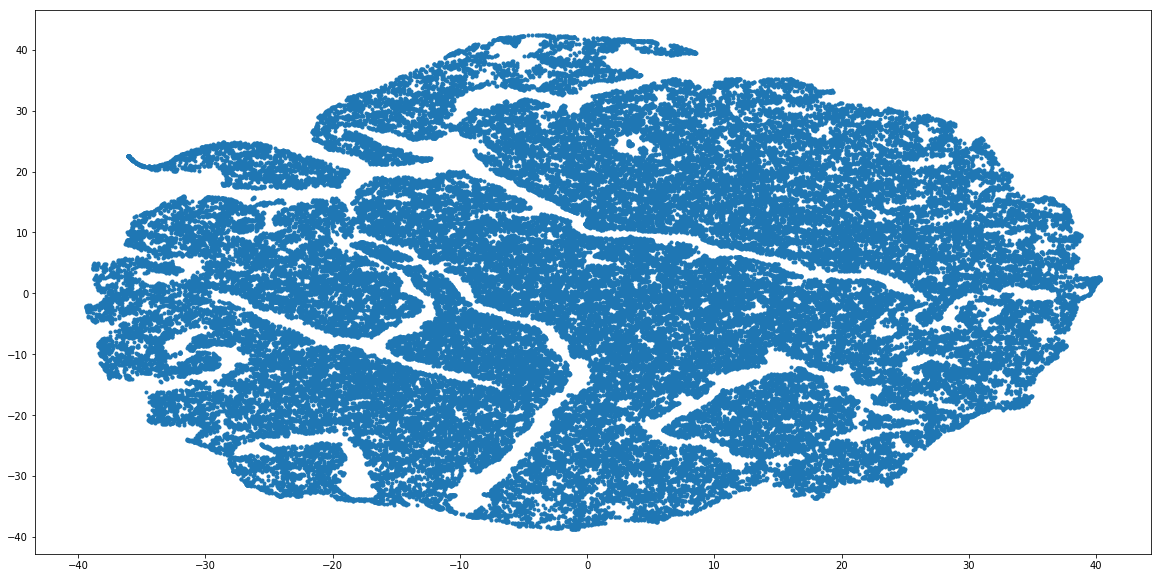

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(Y[:, 0], Y[:, 1], marker='.')
plt.show()

In [17]:
from sklearn.ensemble import IsolationForest

In [39]:
clf = IsolationForest(max_samples=1000000, max_features=12)
clf.fit(playlistFeatures)

IsolationForest(bootstrap=False, contamination=0.1, max_features=12,
        max_samples=1000000, n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [40]:
y = clf.predict(playlistFeatures)

In [41]:
unique, counts = np.unique(y, return_counts=True)

In [42]:
dict(zip(unique, counts))

{-1: 100000, 1: 900000}

In [31]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
playlistFeaturesScaled = StandardScaler().fit_transform(playlistFeatures[idx])

In [33]:
playlistFeatures2D = PCA(n_components=2).fit_transform(playlistFeaturesScaled)

In [37]:
clf = LocalOutlierFactor(n_neighbors=5000)
y = clf.fit_predict(playlistFeaturesScaled)

In [38]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{-1: 10000, 1: 90000}

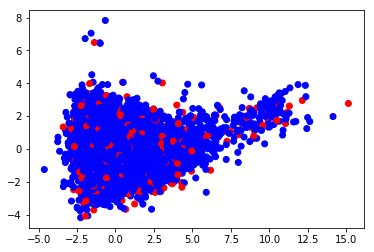

In [39]:
colors = {1:'blue', -1:'red'}

plt.scatter(playlistFeatures2D[:10000, 0], playlistFeatures2D[:10000, 1], c=pd.DataFrame(dict(color=y[:1000]))['color'].apply(lambda x: colors[x]))

In [19]:
y

array([1, 1, 1, ..., 1, 1, 1])

## Max Playlist Features

In [28]:
playlistFeatures = d.getPlaylistMaxFeatures()

In [29]:
cols = ['energy', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'timesig']
playlistFeaturesDF = pd.DataFrame(playlistFeatures, columns=cols)

In [31]:
playlistFeaturesDF.head()

,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,timesig
0,0.976,0.938,11.0,-1.600,1.0,0.5010,0.488,0.0250,0.731,0.965,210.750,4.0
1,0.975,0.829,11.0,-2.502,1.0,0.4920,0.893,0.9910,0.657,0.886,185.397,4.0
2,0.922,0.853,11.0,-1.029,1.0,0.4150,0.787,0.0394,0.631,0.961,189.577,4.0
3,0.986,0.890,11.0,-3.920,1.0,0.5050,0.989,0.9570,0.869,0.968,190.985,5.0
4,0.911,0.863,9.0,-4.066,1.0,0.0828,0.948,0.7480,0.709,0.964,174.302,4.0


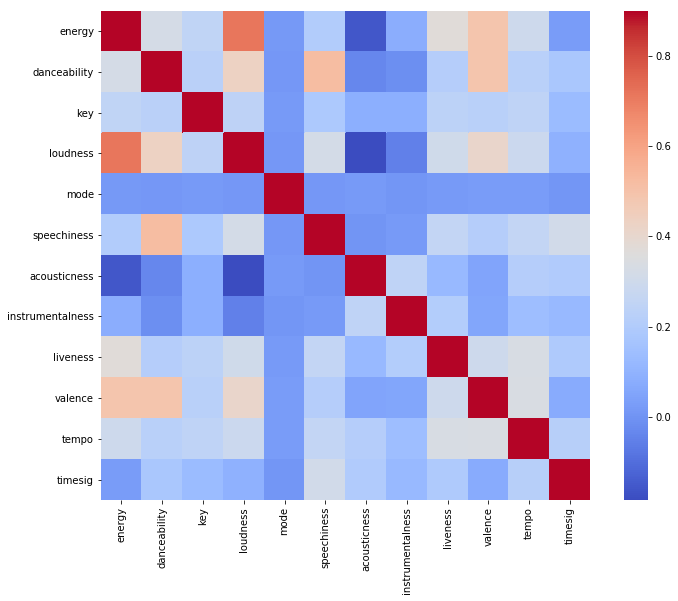

In [32]:
#correlation matrix
corrmat = playlistFeaturesDF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True, cmap='coolwarm');